# Om. Market Prediction Model

In [2]:
!pip install yfinance

In [1]:
# Import libraries
import yfinance as yf
import pandas as pd


In [2]:
# Function to fetch historical data
def fetch_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    return data


In [3]:
# Define tickers, start date, and end date
tickers = ['SPX', 'PHYS', 'CL=F', 'ABCL', 'PLTR', 'SOFI', 'STNE', 'SPWR', 'QQQ', 'MU', 'PATH', 'MAXN', 'ENPH', 'TSLA', 'AMBA']
start_date = '2013-01-01'
end_date = '2023-04-30'

# Fetch historical data
data = fetch_data(tickers, start_date, end_date)

# Display the first few rows of the data
data.head()


[*********************100%***********************]  15 of 15 completed


Adj Close                                                          \
                ABCL   AMBA       CL=F  ENPH MAXN        MU PATH   PHYS PLTR   
Date                                                                           
2013-01-02       NaN  11.95  93.120003  3.79  NaN  6.549712  NaN  14.35  NaN   
2013-01-03       NaN  11.73  92.919998  3.73  NaN  6.816442  NaN  14.20  NaN   
2013-01-04       NaN  11.88  93.089996  3.90  NaN  6.875716  NaN  14.17  NaN   
2013-01-07       NaN  11.93  93.190002  3.75  NaN  7.093051  NaN  14.10  NaN   
2013-01-08       NaN  12.06  93.150002  3.71  NaN  7.142446  NaN  14.21  NaN   

                       ...      Volume                                        \
                  QQQ  ...          MU PATH       PHYS PLTR         QQQ SOFI   
Date                   ...                                                     
2013-01-02  61.228283  ...  29556500.0  NaN  1067800.0  NaN  70695900.0  NaN   
2013-01-03  60.909351  ...  39091500.0  NaN   742400.0  NaN  47366500.0  NaN   
2013-01-04  60.708927  ...  18802700.0  NaN   856200.0  NaN  33972500.0  NaN   
2013-01-07  60.727146  ...  31133300.0  NaN   645900.0  NaN  26766200.0  NaN   
2013-01-08  60.608700  ...  30791800.0  NaN   943300.0  NaN  28734900.0  NaN   

                                                   
                  SPWR       SPX STNE        TSLA  
Date                                               
2013-01-02   3137374.0       0.0  NaN  17922000.0  
2013-01-03  34448967.0       0.0  NaN  11130000.0  
2013-01-04  19128424.0   13846.0  NaN  10110000.0  
2013-01-07  11154735.0       0.0  NaN   6630000.0  
2013-01-08   8678552.0  249563.0  NaN  19260000.0  

[5 rows x 90 columns]

Handling missing data: Since some companies have recent listings, we will fill the missing data using the fillna method provided by pandas. We'll use forward fill (fillna method = "ffill") to fill missing values with the previous available value.

In [4]:
# Fill missing data using forward fill
data_filled = data.fillna(method='ffill')


Select only the 'Adj Close' column: Since we're mainly interested in the adjusted closing prices of the tickers, let's select only the 'Adj Close' column from the data.

In [5]:
# Select 'Adj Close' column
adj_close_data = data_filled['Adj Close']


In [6]:
data_filled

Adj Close                                                          \
                ABCL       AMBA       CL=F        ENPH       MAXN         MU   
Date                                                                           
2013-01-02       NaN  11.950000  93.120003    3.790000        NaN   6.549712   
2013-01-03       NaN  11.730000  92.919998    3.730000        NaN   6.816442   
2013-01-04       NaN  11.880000  93.089996    3.900000        NaN   6.875716   
2013-01-07       NaN  11.930000  93.190002    3.750000        NaN   7.093051   
2013-01-08       NaN  12.060000  93.150002    3.710000        NaN   7.142446   
...              ...        ...        ...         ...        ...        ...   
2023-04-24      7.17  67.860001  78.760002  224.600006  32.340000  59.509998   
2023-04-25      6.73  64.379997  77.070000  220.600006  31.340000  58.139999   
2023-04-26      6.74  64.639999  74.300003  163.830002  27.620001  61.020000   
2023-04-27      6.64  60.959999  74.760002  164.179993  27.180000  61.900002   
2023-04-28      6.78  61.980000  76.779999  164.199997  28.110001  64.360001   

                                            ...      Volume             \
             PATH   PHYS  PLTR         QQQ  ...          MU       PATH   
Date                                        ...                          
2013-01-02    NaN  14.35   NaN   61.228283  ...  29556500.0        NaN   
2013-01-03    NaN  14.20   NaN   60.909351  ...  39091500.0        NaN   
2013-01-04    NaN  14.17   NaN   60.708927  ...  18802700.0        NaN   
2013-01-07    NaN  14.10   NaN   60.727146  ...  31133300.0        NaN   
2013-01-08    NaN  14.21   NaN   60.608700  ...  30791800.0        NaN   
...           ...    ...   ...         ...  ...         ...        ...   
2023-04-24  15.04  15.59  8.10  315.950012  ...  13402600.0  4545500.0   
2023-04-25  14.42  15.61  7.74  309.989990  ...  15987300.0  4363900.0   
2023-04-26  14.12  15.51  7.74  311.869995  ...  25385000.0  4373800.0   
2023-04-27  14.23  15.52  7.82  320.350006  ...  13524600.0  3692100.0   
2023-04-28  14.08  15.52  7.75  322.559998  ...  18088800.0  3877800.0   

                                                                       \
                 PHYS        PLTR         QQQ        SOFI        SPWR   
Date                                                                    
2013-01-02  1067800.0         NaN  70695900.0         NaN   3137374.0   
2013-01-03   742400.0         NaN  47366500.0         NaN  34448967.0   
2013-01-04   856200.0         NaN  33972500.0         NaN  19128424.0   
2013-01-07   645900.0         NaN  26766200.0         NaN  11154735.0   
2013-01-08   943300.0         NaN  28734900.0         NaN   8678552.0   
...               ...         ...         ...         ...         ...   
2023-04-24  1026000.0  20439300.0  44043100.0  20058000.0   3357900.0   
2023-04-25  1840700.0  21849100.0  57121600.0  21036200.0   4091900.0   
2023-04-26  1406400.0  21396700.0  55400500.0  24210900.0   6491000.0   
2023-04-27  1191300.0  21385500.0  65430400.0  43199900.0   5740400.0   
2023-04-28  1421800.0  24924400.0  59652500.0  55605100.0   5541400.0   

                                              
                 SPX       STNE         TSLA  
Date                                          
2013-01-02       0.0        NaN   17922000.0  
2013-01-03       0.0        NaN   11130000.0  
2013-01-04   13846.0        NaN   10110000.0  
2013-01-07       0.0        NaN    6630000.0  
2013-01-08  249563.0        NaN   19260000.0  
...              ...        ...          ...  
2023-04-24  150100.0  7907200.0  140006600.0  
2023-04-25  150100.0  6473100.0  121999300.0  
2023-04-26  150100.0  4170100.0  153364100.0  
2023-04-27  150100.0  3548600.0  127015200.0  
2023-04-28  150100.0  5119600.0  122515800.0  

[2602 rows x 90 columns]

Select only the 'Adj Close' column: Since we're mainly interested in the adjusted closing prices of the tickers, let's select only the 'Adj Close' column from the data.

In [7]:
# Select 'Adj Close' column
adj_close_data = data_filled['Adj Close']


Calculate daily returns: To analyze and predict stock market movements, we will work with daily returns instead of absolute prices. We can calculate daily returns by dividing the current day's adjusted closing price by the previous day's adjusted closing price and subtracting one.

In [8]:
# Calculate daily returns
daily_returns = adj_close_data.pct_change().dropna()


Now that we have cleaned and prepared our data, we can move on to exploratory data analysis and visualization. We'll start by importing the necessary libraries and visualizing the correlations between the daily returns of the selected tickers.

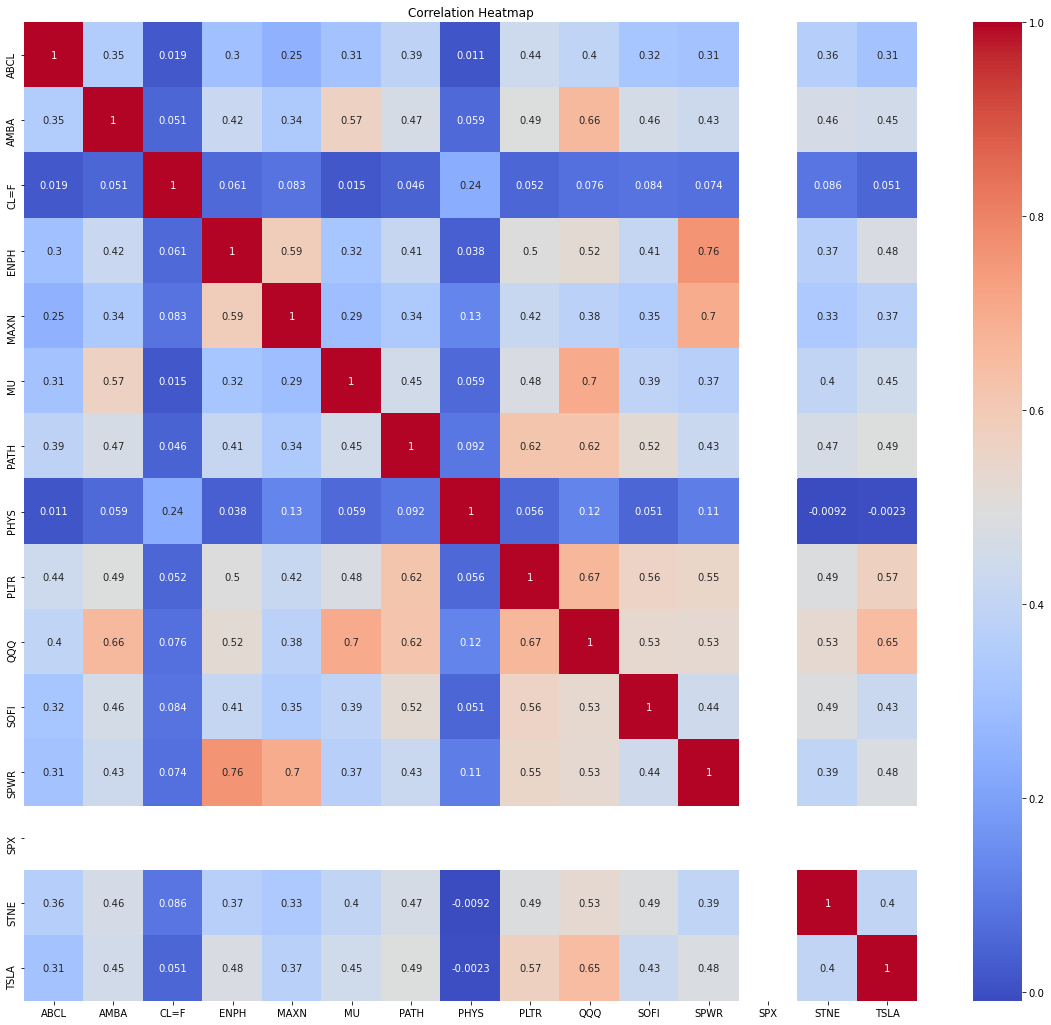

In [10]:
# Enable inline plotting in Jupyter Notebook
%matplotlib inline

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlations between daily returns
correlations = daily_returns.corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(20, 18))  # Increase the width and height of the plot
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



Prepare data for the model:

In [14]:
# Calculate the moving average of the past 5 days for each ticker
moving_averages = daily_returns.rolling(window=5).mean().dropna()

# Shift the moving averages by 1 day to avoid using future data in our predictions
moving_averages_shifted = moving_averages.shift(1).dropna()

# Add the shifted moving averages to the daily_returns DataFrame
daily_returns_with_features = daily_returns.join(moving_averages_shifted, rsuffix='_5d_mavg').dropna()

# Display the first few rows of the prepared data
daily_returns_with_features.head()


ABCL      AMBA      CL=F      ENPH      MAXN        MU  \
Date                                                                     
2021-04-29 -0.041625 -0.006950  0.018008 -0.023892 -0.029549  0.023596   
2021-04-30 -0.074010 -0.052391 -0.021997 -0.028940 -0.038462 -0.022598   
2021-05-03 -0.024390 -0.032619  0.014313 -0.020395 -0.027778 -0.012199   
2021-05-04  0.076923 -0.039232  0.018608 -0.062899 -0.047429 -0.007175   
2021-05-05  0.050714  0.029577 -0.000913 -0.007432 -0.074385  0.008767   

                PATH      PHYS      PLTR       QQQ  ...  MU_5d_mavg  \
Date                                                ...               
2021-04-29 -0.001591 -0.003539 -0.020126  0.003599  ...   -0.007338   
2021-04-30 -0.043698 -0.007812 -0.014121 -0.006555  ...    0.008064   
2021-05-03 -0.014861  0.013601 -0.032118 -0.005325  ...    0.000428   
2021-05-04  0.043000 -0.005650 -0.029596 -0.017996  ...   -0.006220   
2021-05-05 -0.042038  0.004972 -0.022643 -0.003362  ...   -0.011343   

            PATH_5d_mavg  PHYS_5d_mavg  PLTR_5d_mavg  QQQ_5d_mavg  \
Date                                                                
2021-04-29      0.019689     -0.001262      0.010666    -0.000133   
2021-04-30      0.000530     -0.000704      0.004608     0.002997   
2021-05-03     -0.006461     -0.001559     -0.003028    -0.000832   
2021-05-04     -0.025388      0.001162     -0.015432    -0.003199   
2021-05-05     -0.003324      0.000316     -0.019443    -0.005932   

            SOFI_5d_mavg  SPWR_5d_mavg  SPX_5d_mavg  STNE_5d_mavg  \
Date                                                                
2021-04-29      0.029116      0.004275          0.0      0.007589   
2021-04-30      0.019464     -0.003288          0.0      0.004424   
2021-05-03      0.010364     -0.023734          0.0     -0.008803   
2021-05-04     -0.003356     -0.033505          0.0     -0.017436   
2021-05-05     -0.014433     -0.045146          0.0     -0.022913   

            TSLA_5d_mavg  
Date                      
2021-04-29     -0.013455  
2021-04-30     -0.011900  
2021-05-03     -0.005015  
2021-05-04     -0.014346  
2021-05-05     -0.008580  

[5 rows x 30 columns]

Split the data into training and testing sets:

In [16]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Define the target variable (in this case, we'll predict the daily return of the SPX)
y = daily_returns_with_features['SPX']

# Define the feature variables (drop the target variable from the DataFrame)
X = daily_returns_with_features.drop('SPX', axis=1)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Import LinearRegression model and mean_squared_error function
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instantiate the LinearRegression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0


Machine Learning (ML) is a subset of artificial intelligence that enables computers to learn from and make predictions or decisions based on data without being explicitly programmed. The idea is to create algorithms that can generalize from a set of examples, and then make predictions for new, unseen data.

In the context of our example, we are trying to predict the daily return of the SPX based on the daily returns of other tickers and their 5-day moving averages. We are using a simple linear regression model to accomplish this.

Training and Testing Data:
When building a machine learning model, it's essential to have a way to evaluate its performance. One common approach is to split the available data into two sets: training and testing data. The training data is used to train the model, while the testing data is used to evaluate its performance. This helps to ensure that the model generalizes well to new, unseen data.
In our example, we use the train_test_split function from scikit-learn (sklearn) to split the data into training (80%) and testing (20%) sets.

scikit-learn (sklearn):
Scikit-learn is an open-source Python library that provides simple and efficient tools for data mining and data analysis. It includes various machine learning algorithms, such as classification, regression, clustering, and dimensionality reduction. It also provides tools for model selection, preprocessing, and evaluation.
In our example, we use scikit-learn's LinearRegression model and mean_squared_error function.

Linear Regression:
Linear regression is a simple machine learning algorithm that tries to model the relationship between a target variable (in our case, the daily return of the SPX) and one or more feature variables (the daily returns of other tickers and their 5-day moving averages) using a linear equation. The goal is to find the best-fitting line that minimizes the differences between the predicted and actual values.
In our example, we instantiate a LinearRegression model, train it using the training data, and make predictions on the testing data.

Model Evaluation:
To evaluate the performance of the machine learning model, we use various metrics, such as accuracy, precision, recall, or mean squared error (MSE). In the case of regression problems, MSE is a common metric that measures the average squared difference between the predicted and actual values. A lower MSE indicates better predictions.


In [18]:
# Import mean_absolute_error and r2_score functions
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate the mean absolute error of the predictions
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R^2 score of the predictions
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)


Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R^2 Score: 1.0


it's highly unlikely to have such a perfect score in predicting market movements. There might be an issue with the data or the model. Let's first check if the target variable and features have been separated correctly by printing the head of the X and y DataFrames.

In [19]:
print("X DataFrame head:")
print(X.head())
print("\n")
print("y DataFrame head:")
print(y.head())


X DataFrame head:
                ABCL      AMBA      CL=F      ENPH      MAXN        MU  \
Date                                                                     
2021-04-29 -0.041625 -0.006950  0.018008 -0.023892 -0.029549  0.023596   
2021-04-30 -0.074010 -0.052391 -0.021997 -0.028940 -0.038462 -0.022598   
2021-05-03 -0.024390 -0.032619  0.014313 -0.020395 -0.027778 -0.012199   
2021-05-04  0.076923 -0.039232  0.018608 -0.062899 -0.047429 -0.007175   
2021-05-05  0.050714  0.029577 -0.000913 -0.007432 -0.074385  0.008767   

                PATH      PHYS      PLTR       QQQ  ...  MU_5d_mavg  \
Date                                                ...               
2021-04-29 -0.001591 -0.003539 -0.020126  0.003599  ...   -0.007338   
2021-04-30 -0.043698 -0.007812 -0.014121 -0.006555  ...    0.008064   
2021-05-03 -0.014861  0.013601 -0.032118 -0.005325  ...    0.000428   
2021-05-04  0.043000 -0.005650 -0.029596 -0.017996  ...   -0.006220   
2021-05-05 -0.042038  0.004972 -0.022